## Exercise 48: Predicting Avocade Price Using Neural Networks 

In [1]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('data/avocado.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [2]:
#Split the data column into days and months
data['Day'], data['Month'] = data.Date.str[:2], data.Date.str[3:5]
#drop date and unnamed
data = data.drop(['Unnamed: 0', 'Date'], axis = 1)

In [3]:
#Use LabelEncoder for categorical variables 
from sklearn.preprocessing import LabelEncoder 
from collections import defaultdict 

#Create label dictionary 
label_dict = defaultdict(LabelEncoder)

data[['region', 'type', 'Day', 'Month', 'year']] = data[['region', 'type', 'Day', 'Month', 'year']]\
                                                   .apply(lambda x: label_dict[x.name].fit_transform(x))

In [4]:
#Split the data into training and test data 
from sklearn.model_selection import train_test_split

X = data 
y = X.pop('AveragePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [11]:
#Use callbacks to save the model whenever the loss improves and for early stoppping of the model 
from keras.callbacks import ModelCheckpoint, EarlyStopping 

filepath = 'Models/avocado-{epoch:02d}-{val_loss:.2f}.hdf5'

model_ckpt = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
es = EarlyStopping(monitor='val_loss', min_delta=1, patience=50, verbose=1)

callbacks = [model_ckpt, es]

In [12]:
from keras.models import Sequential 
from keras.layers import Dense 

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=13))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32, callbacks=callbacks)
model.evaluate(X_test, y_test)

Epoch 1/1000
350/400 [=========================>....] - ETA: 0s - loss: 15954251776.0000
Epoch 00001: val_loss improved from inf to 96683760.00000, saving model to Models/avocado-01-96683760.00.hdf5
400/400 [==============================] - 0s 1ms/step - loss: 13998217216.0000 - val_loss: 96683760.0000
Epoch 2/1000
397/400 [============================>.] - ETA: 0s - loss: 62163376.0000
Epoch 00002: val_loss improved from 96683760.00000 to 32917598.00000, saving model to Models/avocado-02-32917598.00.hdf5
400/400 [==============================] - 0s 1ms/step - loss: 61860688.0000 - val_loss: 32917598.0000
Epoch 3/1000
334/400 [========================>.....] - ETA: 0s - loss: 23715368.0000
Epoch 00003: val_loss improved from 32917598.00000 to 17382458.00000, saving model to Models/avocado-03-17382458.00.hdf5
400/400 [==============================] - 0s 1ms/step - loss: 22542842.0000 - val_loss: 17382458.0000
Epoch 4/1000
341/400 [========================>.....] - ETA: 0s - loss: 129

Epoch 29/1000
336/400 [========================>.....] - ETA: 0s - loss: 2609.7283
Epoch 00029: val_loss improved from 4511.00195 to 3330.49414, saving model to Models/avocado-29-3330.49.hdf5
400/400 [==============================] - 0s 1ms/step - loss: 2376.5859 - val_loss: 3330.4941
Epoch 30/1000
374/400 [===========================>..] - ETA: 0s - loss: 2016.9131
Epoch 00030: val_loss improved from 3330.49414 to 2368.42310, saving model to Models/avocado-30-2368.42.hdf5
400/400 [==============================] - 1s 1ms/step - loss: 1911.7429 - val_loss: 2368.4231
Epoch 31/1000
347/400 [=========================>....] - ETA: 0s - loss: 1382.9622
Epoch 00031: val_loss improved from 2368.42310 to 1560.13538, saving model to Models/avocado-31-1560.14.hdf5
400/400 [==============================] - 0s 1ms/step - loss: 1486.0372 - val_loss: 1560.1354
Epoch 32/1000
354/400 [=========================>....] - ETA: 0s - loss: 1155.7751
Epoch 00032: val_loss improved from 1560.13538 to 961.78

346/400 [========================>.....] - ETA: 0s - loss: 0.1808
Epoch 00059: val_loss did not improve from 0.16738
400/400 [==============================] - 0s 991us/step - loss: 0.1782 - val_loss: 0.1675
Epoch 60/1000
393/400 [============================>.] - ETA: 0s - loss: 0.1704
Epoch 00060: val_loss did not improve from 0.16738
400/400 [==============================] - 0s 1ms/step - loss: 0.1703 - val_loss: 0.1676
Epoch 61/1000
346/400 [========================>.....] - ETA: 0s - loss: 0.1700
Epoch 00061: val_loss did not improve from 0.16738
400/400 [==============================] - 0s 983us/step - loss: 0.1681 - val_loss: 0.1676
Epoch 62/1000
345/400 [========================>.....] - ETA: 0s - loss: 0.1623
Epoch 00062: val_loss did not improve from 0.16738
400/400 [==============================] - 0s 986us/step - loss: 0.1650 - val_loss: 0.1676
Epoch 63/1000
353/400 [=========================>....] - ETA: 0s - loss: 0.1606
Epoch 00063: val_loss did not improve from 0.167

361/400 [==========================>...] - ETA: 0s - loss: 0.1608
Epoch 00095: val_loss did not improve from 0.16726
400/400 [==============================] - 0s 947us/step - loss: 0.1618 - val_loss: 0.1673
Epoch 96/1000
351/400 [=========================>....] - ETA: 0s - loss: 0.1609
Epoch 00096: val_loss did not improve from 0.16726
400/400 [==============================] - 0s 966us/step - loss: 0.1618 - val_loss: 0.1674
Epoch 97/1000
347/400 [=========================>....] - ETA: 0s - loss: 0.1618
Epoch 00097: val_loss did not improve from 0.16726
400/400 [==============================] - 0s 973us/step - loss: 0.1618 - val_loss: 0.1673
Epoch 98/1000
355/400 [=========================>....] - ETA: 0s - loss: 0.1610
Epoch 00098: val_loss did not improve from 0.16726
400/400 [==============================] - 0s 955us/step - loss: 0.1618 - val_loss: 0.1674
Epoch 00098: early stopping
172/172 [==============================] - 0s 572us/step - loss: 0.1674


0.1674385964870453

In [14]:
results = model.evaluate(X_test, y_test)
results

172/172 [==============================] - 0s 572us/step - loss: 0.1674


0.1674385964870453

In [10]:
model.metrics_names

['loss']

## Exercise 49: Predicting Avocado Price Using Entity Embedding

In [1]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('data/avocado.csv')
data.info()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [2]:
#Split the data column into days and months
data['Day'], data['Month'] = data.Date.str[:2], data.Date.str[3:5]
#drop date and unnamed
data = data.drop(['Unnamed: 0', 'Date'], axis = 1)

In [3]:
#Use LabelEncoder for categorical variables 
from sklearn.preprocessing import LabelEncoder 
from collections import defaultdict 

#Create label dictionary 
label_dict = defaultdict(LabelEncoder)

data[['region', 'type', 'Day', 'Month', 'year']] = data[['region', 'type', 'Day', 'Month', 'year']]\
                                                   .apply(lambda x: label_dict[x.name].fit_transform(x))

In [4]:
#Split the data into training and test data 
from sklearn.model_selection import train_test_split

X = data 
y = X.pop('AveragePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [5]:
#Create a dictionary that maps categorical column names to the unique values in them 
cat_cols_dict = {col: list(data[col].unique()) for col in ['region', 'type', 'Day', 'Month', 'year']}

In [6]:
#Get the input data in the format the embedding neural network will accept 
train_input_list = []
test_input_list = []

for col in cat_cols_dict.keys():
    raw_values = np.unique(data[col])
    value_map = {}
    for i in range(len(raw_values)):
        value_map[raw_values[i]] = i
    train_input_list.append(X_train[col].map(value_map).values)
    test_input_list.append(X_test[col].map(value_map).fillna(0).values)

other_cols = [col for col in data.columns if (not col in cat_cols_dict.keys())]
train_input_list.append(X_train[other_cols].values)
test_input_list.append(X_test[other_cols].values)

train_input_list

[array([53, 21,  2, ..., 42, 16,  9]),
 array([0, 1, 1, ..., 0, 1, 0]),
 array([ 7, 16, 24, ..., 23,  1,  9]),
 array([4, 3, 1, ..., 6, 7, 4]),
 array([1, 1, 3, ..., 1, 0, 0]),
 array([[1.05294048e+06, 6.23286740e+05, 1.83588620e+05, ...,
         1.24984250e+05, 8.35601900e+04, 4.29667000e+03],
        [2.00015400e+04, 2.83014000e+03, 1.35565700e+04, ...,
         3.47320000e+02, 3.26751000e+03, 0.00000000e+00],
        [4.74211500e+04, 1.62630000e+03, 7.91327000e+03, ...,
         3.78221300e+04, 1.00000000e+01, 0.00000000e+00],
        ...,
        [8.17357280e+05, 1.58290860e+05, 5.27450530e+05, ...,
         7.28537700e+04, 1.01394000e+03, 1.39861000e+03],
        [2.72836000e+03, 6.96300000e+01, 1.98740000e+02, ...,
         2.44855000e+03, 0.00000000e+00, 0.00000000e+00],
        [2.59598760e+05, 1.19823900e+04, 1.72173770e+05, ...,
         2.25069200e+04, 5.02650400e+04, 2.62550000e+02]])]

In [7]:
cols_out_dict = {'region':12, 
                 'type': 1,
                 'Day': 10,
                 'Month': 3,
                 'year': 1}

In [8]:
#Now we create the embedding layers for the categorical variables 
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout
from keras.layers.embeddings import Embedding

inputs = []
embeddings = []

for col in cat_cols_dict.keys():
    inp = Input(shape=(1,), name = f'input_{col}')
    embedding = Embedding(len(cat_cols_dict[col]), cols_out_dict[col], input_length=1, name=f'embedding_{col}')(inp)
    embedding = Reshape(target_shape=(cols_out_dict[col],))(embedding)
    inputs.append(inp)
    embeddings.append(embedding)

In [9]:
input_numeric = Input(shape=(8, ))
embedding_numeric = Dense(16)(input_numeric)
inputs.append(input_numeric)
embeddings.append(embedding_numeric)

x = Concatenate()(embeddings)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = Model(inputs, output)
model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_region (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_type (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_Day (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_Month (InputLayer)        [(None, 1)]          0                                            
_______________________________________________________________________________________

In [10]:
model.fit(train_input_list, y_train, validation_data = (test_input_list, y_test), epochs=50, batch_size=32)

Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 298655842304.0000 - val_loss: 579930176.0000
Epoch 2/50
400/400 [==============================] - 1s 1ms/step - loss: 491214112.0000 - val_loss: 437478368.0000
Epoch 3/50
400/400 [==============================] - 1s 1ms/step - loss: 320238976.0000 - val_loss: 222775760.0000
Epoch 4/50
400/400 [==============================] - 1s 1ms/step - loss: 215002448.0000 - val_loss: 145548320.0000
Epoch 5/50
400/400 [==============================] - 1s 1ms/step - loss: 181297216.0000 - val_loss: 107870744.0000
Epoch 6/50
400/400 [==============================] - 1s 1ms/step - loss: 143366560.0000 - val_loss: 108308232.0000
Epoch 7/50
400/400 [==============================] - 1s 1ms/step - loss: 73185568.0000 - val_loss: 48038888.0000
Epoch 8/50
400/400 [==============================] - 1s 1ms/step - loss: 56736324.0000 - val_loss: 41787180.0000
Epoch 9/50
400/400 [==============================] - 1s 1ms/step - loss:

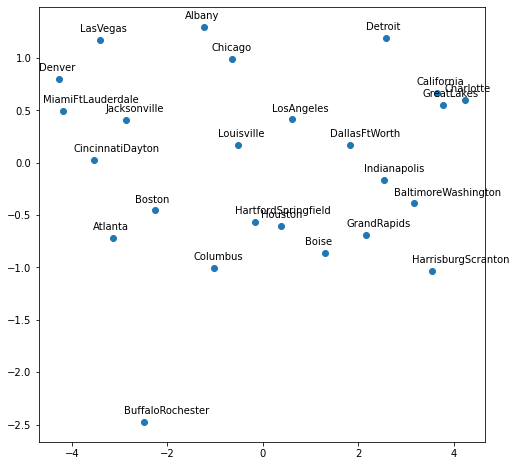

In [12]:
embedding_region = model.get_layer('embedding_region').get_weights()[0]

label_dict['region'].inverse_transform(cat_cols_dict['region'])

#Visualize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Y = pca.fit_transform(embedding_region[:25])
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate((label_dict['region'].inverse_transform(cat_cols_dict['region']))[:25]):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-20, 8), textcoords = 'offset points')
plt.show()

In [20]:
from keras.models import load_model

model = load_model('Models/avocado-32-0.17.hdf5')

In [21]:
model.evaluate(X_test, y_test)

172/172 [==============================] - 0s 598us/step - loss: 0.1716


0.17164941132068634

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
